Q2 Daniel Lin 322594508


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)

def manual_convolution(image, kernel):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_image = np.zeros((image_height + 2 * pad_height, image_width + 2 * pad_width))
    padded_image[pad_height:pad_height + image_height, pad_width:pad_width + image_width] = image

    output_image = np.zeros_like(image, dtype=np.float64)

    for i in range(image_height):
        for j in range(image_width):
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            output_image[i, j] = np.sum(region * kernel)

    return output_image

def fix_image(image):
    clipped = np.clip(image, 0, 255)
    return clipped.astype(np.uint8)

Q2.1

In [2]:
sobel_x_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float64)

sobel_y_kernel = np.array([
    [-1, -2, -1],
    [0,  0,  0],
    [1,  2,  1]
], dtype=np.float64)

G_x = manual_convolution(image, sobel_x_kernel)
G_y = manual_convolution(image, sobel_y_kernel)

Q2.2

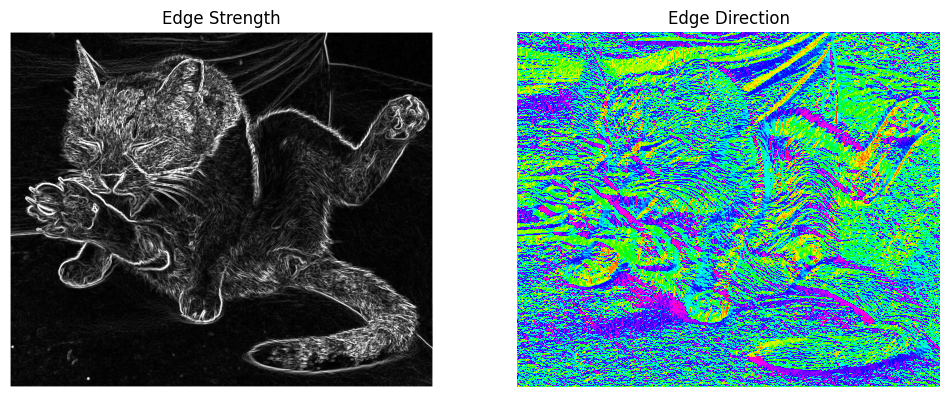

In [11]:
edge_strength = np.sqrt(np.square(G_x) + np.square(G_y))
edge_direction = np.arctan2(G_y, G_x)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(fix_image(edge_strength), cmap="gray")
plt.title("Edge Strength")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(edge_direction, cmap="hsv")
plt.title("Edge Direction")
plt.axis("off")

plt.show()

Q2.3

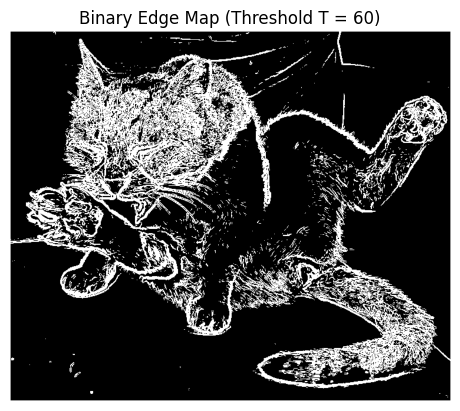

In [17]:
threshold = 60 # the best result was when threshold=60

# יוצרים את המפה הבינארית: איפה שזה מעל T זה יהיה 255 (לבן), אחרת 0 (שחור)
binary_edge_map = (edge_strength > threshold).astype(np.uint8) * 255

# מדפיסים את התוצאה
plt.imshow(binary_edge_map, cmap="gray")
plt.title(f"Binary Edge Map (Threshold T = 60)")
plt.axis("off")
plt.show()